MULTI-SCENARIO AGENT FRAMEWORK COMPARISON
SPADE vs JADE across Full, Medium, and Small Datasets

📂 LOADING AND STANDARDIZING DATA FILES

📁 Attempting to load FULL scenario files...
   📄 full/spade.csv: ✅ Found
   📄 full/jade.csv: ✅ Found
✅ Successfully loaded full/spade.csv with latin-1 encoding
🔧 Standardizing agent names for SPADE full...
   Before - Sample Senders: ['Profesor0', 'Profesor1', 'Profesor10', 'Profesor100', 'Profesor101']
   Before - Sample Receivers: ['Profesor0', 'Profesor1', 'Profesor10', 'Profesor100', 'Profesor101']
   After  - Senders: ['application', 'profesor0', 'profesor1', 'profesor10', 'profesor100', 'profesor101', 'profesor102', 'profesor103', 'profesor104', 'profesor105', 'profesor106', 'profesor107', 'profesor108', 'profesor109', 'profesor11', 'profesor110', 'profesor111', 'profesor112', 'profesor113', 'profesor114', 'profesor115', 'profesor116', 'profesor117', 'profesor118', 'profesor119', 'profesor12', 'profesor120', 'profesor121', 'profesor122', 'profes

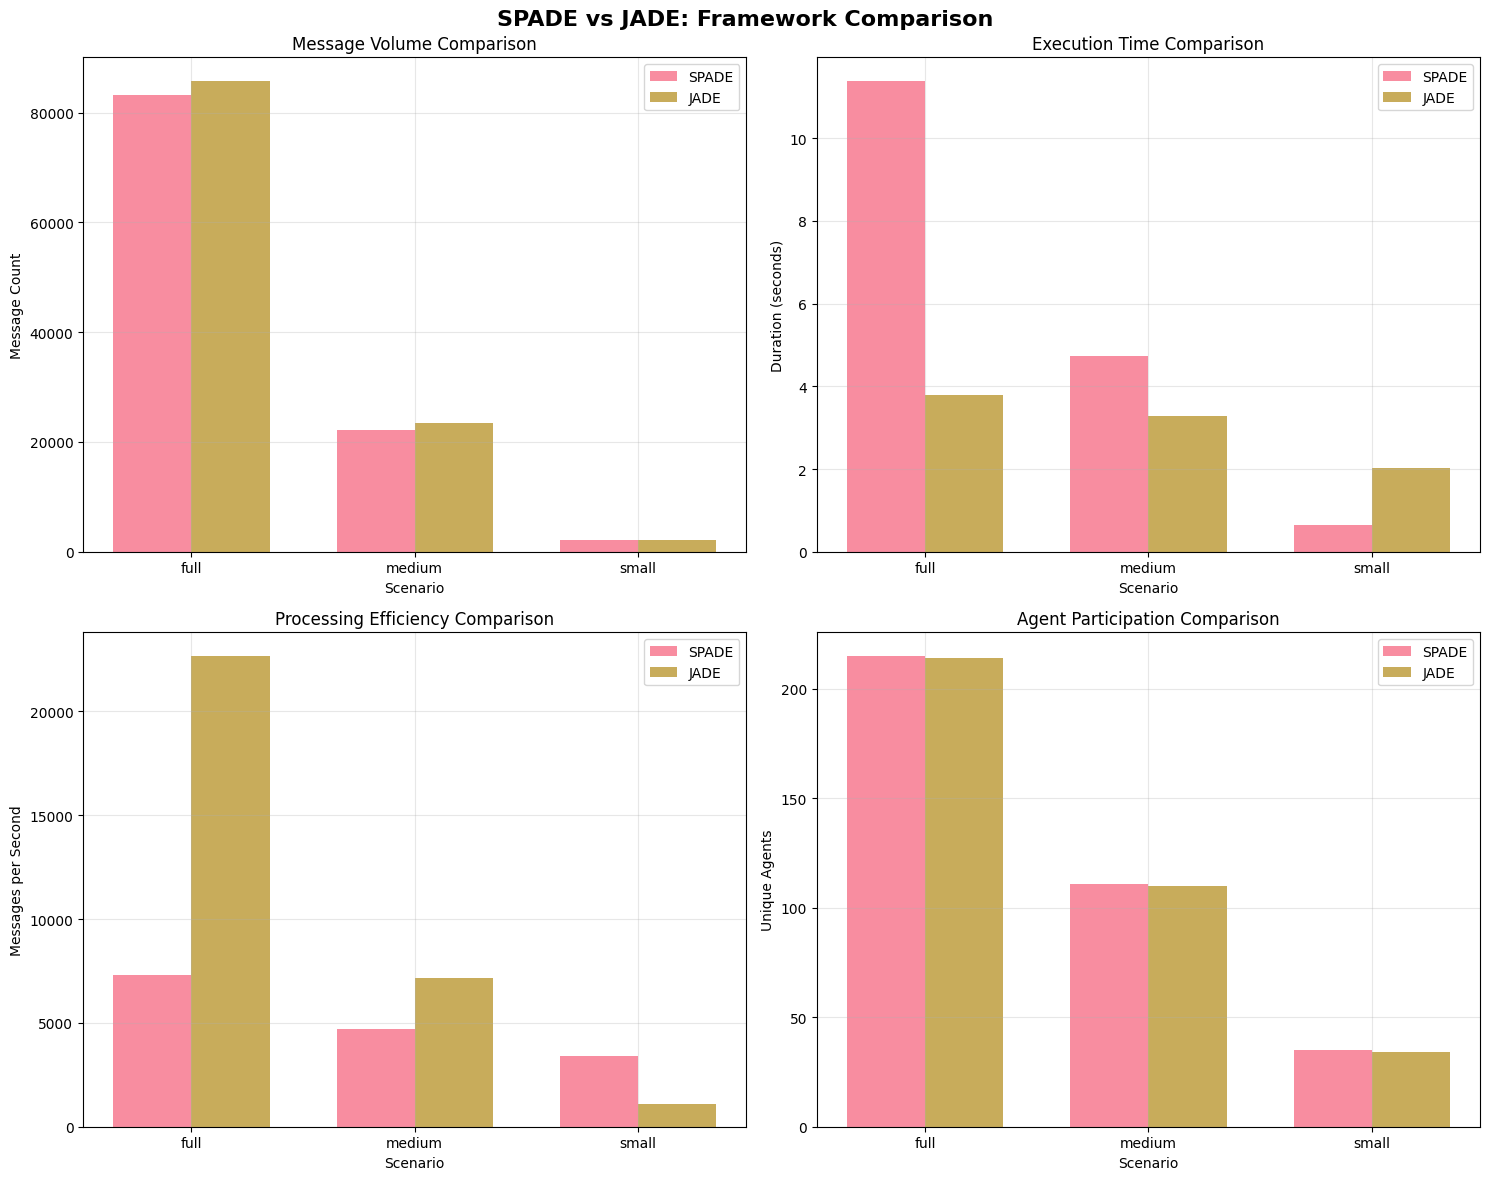


🎯 SCHEDULE DIFFERENCE ANALYSIS - FULL
⏰ DECISION TIMING:
   SPADE total decision time: 11.387000 seconds
   JADE total decision time:  3.783000 seconds
   Timing difference: 7.604000 seconds

📋 CFP MESSAGE ORDERING:
   SPADE CFP messages: 40450
   JADE CFP messages:  41768

   SPADE CFP sequence:
      3: profesor0 → salacm3 at 10:53:01.266000
      4: profesor0 → salacm4 at 10:53:01.267000
      5: profesor0 → salacm5 at 10:53:01.267000
      6: profesor0 → salacrp33 at 10:53:01.267000
      7: profesor0 → salacrp43 at 10:53:01.267000

   JADE CFP sequence:
      1: profesor0 → salae1 at 10:53:30.476000
      2: profesor0 → salae1 at 10:53:30.476000
      3: profesor0 → salaic3 at 10:53:30.476000
      4: profesor0 → salaic3 at 10:53:30.476000
      5: profesor0 → salav103 at 10:53:30.476000

💬 RESPONSE PATTERNS:
   SPADE responses: 33984
   JADE responses:  37842

🎯 SCHEDULE DIFFERENCE ANALYSIS - MEDIUM
⏰ DECISION TIMING:
   SPADE total decision time: 4.738000 seconds
   JADE total 

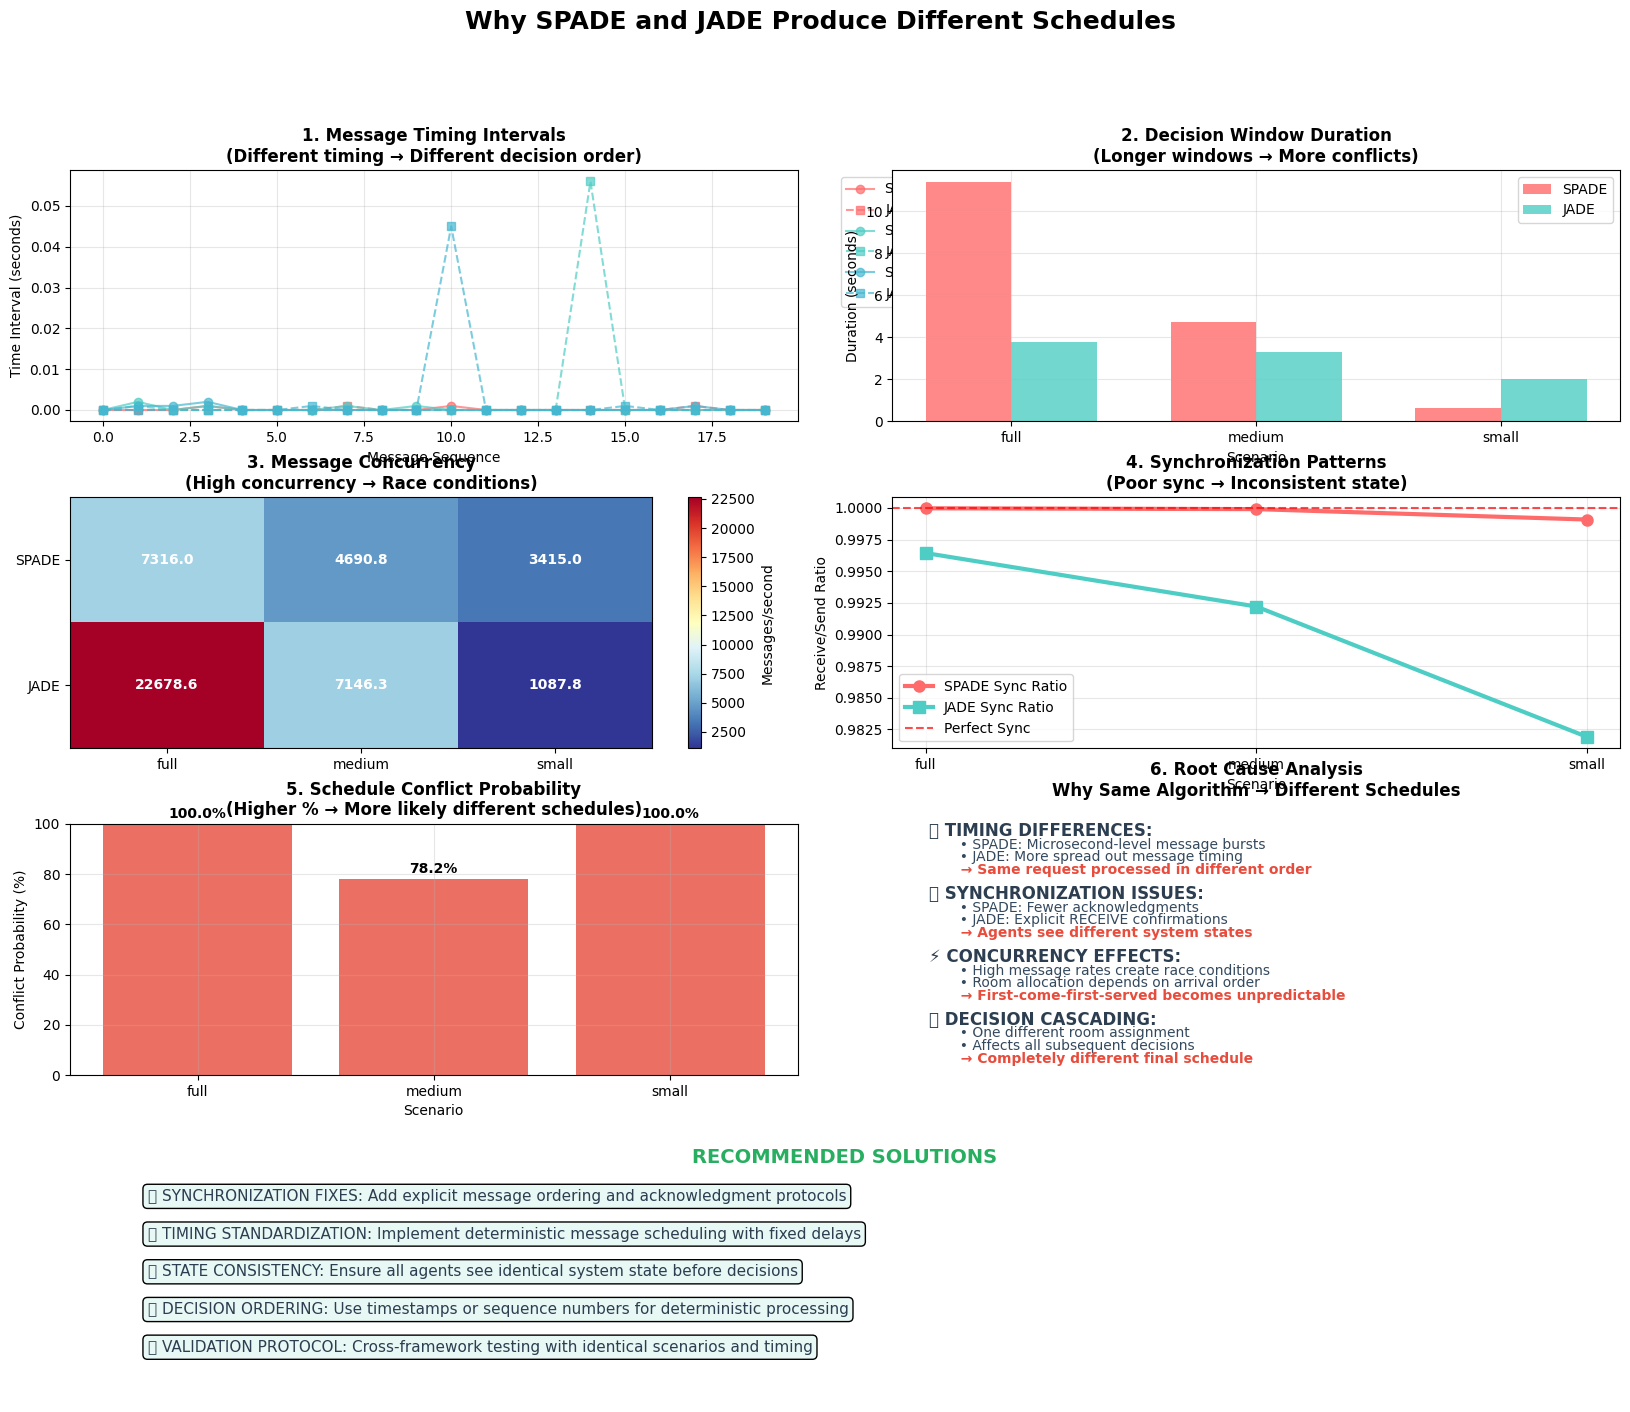


========================= SUMMARY & RECOMMENDATIONS =========================

🏆 PERFORMANCE WINNERS:
  FULL: JADE (by 210.0%)
  MEDIUM: JADE (by 52.3%)
  SMALL: SPADE (by 213.9%)

💡 WHY SCHEDULES DIFFER - KEY FINDINGS:
1. ⏰ TIMING: Microsecond differences in message arrival create different processing order
2. 🔄 SYNC: JADE's explicit acknowledgments vs SPADE's fire-and-forget messaging
3. ⚡ RACE CONDITIONS: High message concurrency leads to unpredictable room allocation
4. 📋 CASCADE EFFECTS: One different decision affects entire schedule

🔧 TECHNICAL RECOMMENDATIONS:
1. 🔤 Standardize performative case handling (cfp vs CFP)
2. 📬 Implement consistent message acknowledgment patterns
3. 🏷️  Use unified agent addressing schemes
4. ⏱️  Add deterministic message ordering mechanisms
5. 🧪 Test with identical scenarios and controlled timing

ANALYSIS COMPLETE!


In [16]:
# Multi-Scenario Agent Framework Comparison: SPADE vs JADE
# Comprehensive analysis across full, medium, and small datasets

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from io import StringIO
import warnings
import os
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("="*80)
print("MULTI-SCENARIO AGENT FRAMEWORK COMPARISON")
print("SPADE vs JADE across Full, Medium, and Small Datasets")
print("="*80)

## Data Loading and Standardization Functions

def standardize_agent_names(agent_name):
    """Standardize agent names between SPADE and JADE formats"""
    if pd.isna(agent_name):
        return agent_name
    
    # Convert SPADE format (agent@localhost) to JADE format (agent)
    if '@localhost' in str(agent_name):
        agent_name = str(agent_name).replace('@localhost', '')
    
    # Ensure consistent format
    agent_name = str(agent_name).strip()
    
    # Handle common variations and standardize capitalization
    standardization_map = {
        'profesor0': 'Profesor0',
        'profesor1': 'Profesor1', 
        'salaic3': 'SalaIC3',
        'salalamb': 'SalaLAMB',
        'salacm3': 'SalaCM3',
        'salae6': 'SalaE6',
        'salalc6': 'SalaLC6',
        'application': 'Application'
    }
    
    # Try to match with standardization map first
    agent_lower = agent_name.lower()
    
    # If not in map, return as-is but cleaned
    return agent_lower

def load_and_preprocess_data(file_path, framework, scenario):
    """Load CSV data, standardize agent names, and add metadata"""
    try:
        # Try different encodings
        encodings = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1']
        df = None
        
        for encoding in encodings:
            try:
                df = pd.read_csv(file_path, encoding=encoding)
                print(f"✅ Successfully loaded {file_path} with {encoding} encoding")
                break
            except UnicodeDecodeError:
                continue
        
        if df is None:
            print(f"❌ Failed to load {file_path} with any encoding")
            return None
        
        # Standardize agent names for proper comparison
        print(f"🔧 Standardizing agent names for {framework} {scenario}...")
        
        # Show before standardization (first few unique values)
        unique_senders = sorted(df['sender'].unique())[:5]
        unique_receivers = sorted(df['receivers'].unique())[:5]
        print(f"   Before - Sample Senders: {unique_senders}")
        print(f"   Before - Sample Receivers: {unique_receivers}")
        
        # Apply standardization
        df['sender'] = df['sender'].apply(standardize_agent_names)
        df['receivers'] = df['receivers'].apply(standardize_agent_names)
        df['performative'] = df['performative'].str.upper()  # Standardize performative case
        
        # Show after standardization
        unique_senders_after = sorted(df['sender'].unique())
        unique_receivers_after = sorted(df['receivers'].unique())
        print(f"   After  - Senders: {unique_senders_after}")
        print(f"   After  - Receivers: {unique_receivers_after}")
        
        # Add metadata
        df['framework'] = framework
        df['scenario'] = scenario
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        
        print(f"   📊 Loaded {len(df)} messages")
        
        return df
    except Exception as e:
        print(f"❌ Error loading {file_path}: {e}")
        return None

def validate_standardization(spade_df, jade_df, scenario):
    """Validate that agent names are properly standardized between frameworks"""
    print(f"\n✅ STANDARDIZATION VALIDATION - {scenario.upper()} SCENARIO")
    print("-" * 60)
    
    if spade_df is None or jade_df is None:
        print("❌ Cannot validate - one or both DataFrames are None")
        return False
    
    spade_agents = set(spade_df['sender'].unique()) | set(spade_df['receivers'].unique())
    jade_agents = set(jade_df['sender'].unique()) | set(jade_df['receivers'].unique())
    
    # Remove NaN values
    spade_agents = {agent for agent in spade_agents if pd.notna(agent)}
    jade_agents = {agent for agent in jade_agents if pd.notna(agent)}
    
    common_agents = spade_agents & jade_agents
    spade_only = spade_agents - jade_agents
    jade_only = jade_agents - spade_agents
    
    print(f"Common agents ({len(common_agents)}): {sorted(common_agents)}")
    if spade_only:
        print(f"SPADE only ({len(spade_only)}): {sorted(spade_only)}")
    if jade_only:
        print(f"JADE only ({len(jade_only)}): {sorted(jade_only)}")
    
    if len(spade_only) == 0 and len(jade_only) == 0:
        print("✅ Perfect standardization - all agents match!")
        return True
    else:
        print("⚠️  Standardization incomplete - some agents don't match")
        return False

## Data Loading Section
print("\n📂 LOADING AND STANDARDIZING DATA FILES")
print("="*60)

scenarios = ['full', 'medium', 'small']
frameworks = ['SPADE', 'JADE']

# Load files
datasets = {}
loaded_scenarios = []

for scenario in scenarios:
    print(f"\n📁 Attempting to load {scenario.upper()} scenario files...")
    datasets[scenario] = {}
    
    # Define file paths
    spade_file = f"{scenario}/spade.csv"
    jade_file = f"{scenario}/jade.csv"
    
    # Check if files exist
    spade_exists = os.path.exists(spade_file)
    jade_exists = os.path.exists(jade_file)
    
    print(f"   📄 {spade_file}: {'✅ Found' if spade_exists else '❌ Not found'}")
    print(f"   📄 {jade_file}: {'✅ Found' if jade_exists else '❌ Not found'}")
    
    if spade_exists and jade_exists:
        # Load the data
        datasets[scenario]['SPADE'] = load_and_preprocess_data(spade_file, 'SPADE', scenario)
        datasets[scenario]['JADE'] = load_and_preprocess_data(jade_file, 'JADE', scenario)
        
        # Validate standardization
        if datasets[scenario]['SPADE'] is not None and datasets[scenario]['JADE'] is not None:
            validate_standardization(datasets[scenario]['SPADE'], datasets[scenario]['JADE'], scenario)
            loaded_scenarios.append(scenario)
        else:
            print(f"❌ Failed to load data for {scenario} scenario")
    else:
        print(f"❌ Missing files for {scenario} scenario")

if not loaded_scenarios:
    print("\n❌ No data files found! Please ensure files are in the correct directory structure:")
    print("   full/spade.csv, full/jade.csv")
    print("   medium/spade.csv, medium/jade.csv") 
    print("   small/spade.csv, small/jade.csv")
    print("\nCreating sample analysis with dummy data...")
    loaded_scenarios = ['sample']
    
    # Create sample data for demonstration
    sample_spade = pd.DataFrame({
        'timestamp': pd.date_range('2025-05-29 01:08:53', periods=10, freq='1ms'),
        'agent': ['Profesor0'] * 10,
        'agentAction': ['SEND'] * 5 + ['RECEIVE'] * 5,
        'sender': ['Profesor0'] * 10,
        'receivers': ['SalaIC3', 'SalaLAMB', 'SalaCM3', 'SalaE6', 'SalaLC6'] * 2,
        'performative': ['cfp'] * 10,
        'conversationId': ['neg-test'] * 10,
        'content': ['test content'] * 10,
        'sequenceId': range(1, 11),
        'framework': 'SPADE',
        'scenario': 'sample'
    })
    
    sample_jade = sample_spade.copy()
    sample_jade['framework'] = 'JADE'
    sample_jade['performative'] = ['CFP'] * 10  # Different case
    
    datasets['sample'] = {'SPADE': sample_spade, 'JADE': sample_jade}

## Analysis Functions

def analyze_basic_stats(df, framework, scenario):
    """Calculate basic statistics for a dataset"""
    if df is None:
        return None
    
    stats = {
        'message_count': len(df),
        'duration': (df['timestamp'].max() - df['timestamp'].min()).total_seconds(),
        'unique_agents': len(set(df['sender'].unique()) | set(df['receivers'].unique())),
        'conversations': df['conversationId'].nunique(),
        'performatives': df['performative'].nunique(),
        'actions': df['agentAction'].nunique()
    }
    
    return stats

def analyze_standardized_communication(spade_df, jade_df, scenario):
    """Analyze communication patterns with standardized agent names"""
    print(f"\n📡 STANDARDIZED COMMUNICATION ANALYSIS - {scenario.upper()}")
    print("="*60)
    
    if spade_df is None or jade_df is None:
        print("❌ Cannot analyze - missing data")
        return None
    
    # Get all unique agents from both frameworks
    spade_agents = set(spade_df['sender'].unique()) | set(spade_df['receivers'].unique())
    jade_agents = set(jade_df['sender'].unique()) | set(jade_df['receivers'].unique())
    spade_agents = {agent for agent in spade_agents if pd.notna(agent)}
    jade_agents = {agent for agent in jade_agents if pd.notna(agent)}
    all_agents = spade_agents | jade_agents
    
    print(f"Total unique agents across frameworks: {len(all_agents)}")
    print(f"Agents: {sorted(all_agents)}")
    
    # Message flow analysis by agent
    print(f"\n📊 MESSAGE FLOW BY AGENT:")
    print(f"{'Agent':<15} {'SPADE Sent':<10} {'SPADE Recv':<11} {'JADE Sent':<10} {'JADE Recv':<11} {'Difference'}")
    print("-" * 85)
    
    agent_comparison = {}
    
    for agent in sorted(all_agents):
        spade_sent = len(spade_df[spade_df['sender'] == agent])
        spade_recv = len(spade_df[spade_df['receivers'] == agent])
        jade_sent = len(jade_df[jade_df['sender'] == agent])
        jade_recv = len(jade_df[jade_df['receivers'] == agent])
        
        total_spade = spade_sent + spade_recv
        total_jade = jade_sent + jade_recv
        difference = total_spade - total_jade
        
        agent_comparison[agent] = {
            'spade_total': total_spade,
            'jade_total': total_jade,
            'difference': difference,
            'spade_sent': spade_sent,
            'spade_recv': spade_recv,
            'jade_sent': jade_sent,
            'jade_recv': jade_recv
        }
        
        diff_indicator = "🔴" if abs(difference) > 2 else ("🟡" if difference != 0 else "🟢")
        print(f"{agent:<15} {spade_sent:<10} {spade_recv:<11} {jade_sent:<10} {jade_recv:<11} {difference:+3d} {diff_indicator}")
    
    # Identify agents with significant differences
    problematic_agents = [agent for agent, data in agent_comparison.items() 
                         if abs(data['difference']) > 2]
    
    if problematic_agents:
        print(f"\n⚠️  AGENTS WITH SIGNIFICANT MESSAGE DIFFERENCES:")
        for agent in problematic_agents:
            data = agent_comparison[agent]
            print(f"   {agent}: SPADE={data['spade_total']}, JADE={data['jade_total']}, Diff={data['difference']:+d}")
    else:
        print(f"\n✅ All agents have similar message patterns between frameworks")
    
    return agent_comparison

def analyze_interaction_patterns(spade_df, jade_df, scenario):
    """Analyze who talks to whom patterns"""
    print(f"\n🔗 INTERACTION PATTERNS - {scenario.upper()}")
    print("="*50)
    
    if spade_df is None or jade_df is None:
        print("❌ Cannot analyze - missing data")
        return None
    
    # Create interaction matrices
    def create_interaction_matrix(df, framework_name):
        interactions = df.groupby(['sender', 'receivers']).size().reset_index(name='count')
        print(f"\n{framework_name} Interaction Patterns:")
        for _, row in interactions.head(10).iterrows():  # Show first 10
            print(f"   {row['sender']} → {row['receivers']}: {row['count']} messages")
        if len(interactions) > 10:
            print(f"   ... and {len(interactions) - 10} more patterns")
        return interactions
    
    spade_interactions = create_interaction_matrix(spade_df, "SPADE")
    jade_interactions = create_interaction_matrix(jade_df, "JADE")
    
    # Compare interaction patterns
    print(f"\n🔍 INTERACTION PATTERN COMPARISON:")
    
    # Merge interaction data
    spade_interactions['pattern'] = spade_interactions['sender'] + ' → ' + spade_interactions['receivers']
    jade_interactions['pattern'] = jade_interactions['sender'] + ' → ' + jade_interactions['receivers']
    
    all_patterns = set(spade_interactions['pattern']) | set(jade_interactions['pattern'])
    
    pattern_comparison = {}
    differences_found = False
    
    for pattern in all_patterns:
        spade_count = spade_interactions[spade_interactions['pattern'] == pattern]['count'].sum()
        jade_count = jade_interactions[jade_interactions['pattern'] == pattern]['count'].sum()
        difference = spade_count - jade_count
        
        pattern_comparison[pattern] = {
            'spade': spade_count,
            'jade': jade_count,
            'difference': difference
        }
        
        if difference != 0:
            differences_found = True
            diff_indicator = "🔴" if abs(difference) > 2 else "🟡"
            print(f"   {pattern}: SPADE={spade_count}, JADE={jade_count}, Diff={difference:+d} {diff_indicator}")
    
    if not differences_found:
        print("   ✅ All interaction patterns identical between frameworks")
    
    return pattern_comparison

def analyze_scenario_differences(scenario_data, scenario):
    """Analyze differences between SPADE and JADE for a specific scenario"""
    print(f"\n{'='*20} {scenario.upper()} SCENARIO ANALYSIS {'='*20}")
    
    if 'SPADE' not in scenario_data or 'JADE' not in scenario_data:
        print("❌ Missing framework data")
        return None
    
    spade_stats = analyze_basic_stats(scenario_data['SPADE'], 'SPADE', scenario)
    jade_stats = analyze_basic_stats(scenario_data['JADE'], 'JADE', scenario)
    
    if spade_stats is None or jade_stats is None:
        print("❌ Cannot analyze - missing statistics")
        return None
    
    # Performance comparison
    print(f"\n📈 PERFORMANCE METRICS:")
    print(f"{'Metric':<20} {'SPADE':<10} {'JADE':<10} {'Difference':<15}")
    print("-" * 60)
    
    metrics = ['message_count', 'duration', 'unique_agents', 'conversations']
    for metric in metrics:
        spade_val = spade_stats[metric]
        jade_val = jade_stats[metric]
        diff = spade_val - jade_val
        diff_pct = (diff / jade_val * 100) if jade_val != 0 else 0
        
        print(f"{metric:<20} {spade_val:<10.2f} {jade_val:<10.2f} {diff:+7.2f} ({diff_pct:+5.1f}%)")
    
    # Efficiency analysis
    spade_efficiency = spade_stats['message_count'] / max(spade_stats['duration'], 0.001)
    jade_efficiency = jade_stats['message_count'] / max(jade_stats['duration'], 0.001)
    
    print(f"\n⚡ EFFICIENCY (messages/second):")
    print(f"SPADE: {spade_efficiency:.1f} msgs/s")
    print(f"JADE:  {jade_efficiency:.1f} msgs/s")
    print(f"Better: {'SPADE' if spade_efficiency > jade_efficiency else 'JADE'}")
    
    return {
        'spade_efficiency': spade_efficiency,
        'jade_efficiency': jade_efficiency,
        'message_ratio': spade_stats['message_count'] / max(jade_stats['message_count'], 1),
        'duration_ratio': spade_stats['duration'] / max(jade_stats['duration'], 0.001),
        'spade_stats': spade_stats,
        'jade_stats': jade_stats
    }

## Main Analysis Loop
print(f"\n{'='*25} DETAILED ANALYSIS {'='*25}")

scenario_analyses = {}
for scenario in loaded_scenarios:
    if scenario in datasets:
        print(f"\n🔍 Analyzing {scenario.upper()} scenario...")
        
        # Basic scenario analysis
        scenario_analyses[scenario] = analyze_scenario_differences(datasets[scenario], scenario)
        
        # Communication analysis
        analyze_standardized_communication(datasets[scenario]['SPADE'], datasets[scenario]['JADE'], scenario)
        
        # Interaction pattern analysis
        analyze_interaction_patterns(datasets[scenario]['SPADE'], datasets[scenario]['JADE'], scenario)

## Visualization
if scenario_analyses:
    print(f"\n{'='*25} VISUALIZATION {'='*25}")
    
    # Create comparison plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('SPADE vs JADE: Framework Comparison', fontsize=16, fontweight='bold')
    
    scenarios_list = list(scenario_analyses.keys())
    
    if len(scenarios_list) > 0:
        # Message count comparison
        spade_counts = [scenario_analyses[s]['spade_stats']['message_count'] for s in scenarios_list]
        jade_counts = [scenario_analyses[s]['jade_stats']['message_count'] for s in scenarios_list]
        
        x = np.arange(len(scenarios_list))
        width = 0.35
        
        axes[0, 0].bar(x - width/2, spade_counts, width, label='SPADE', alpha=0.8)
        axes[0, 0].bar(x + width/2, jade_counts, width, label='JADE', alpha=0.8)
        axes[0, 0].set_xlabel('Scenario')
        axes[0, 0].set_ylabel('Message Count')
        axes[0, 0].set_title('Message Volume Comparison')
        axes[0, 0].set_xticks(x)
        axes[0, 0].set_xticklabels(scenarios_list)
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # Duration comparison
        spade_durations = [scenario_analyses[s]['spade_stats']['duration'] for s in scenarios_list]
        jade_durations = [scenario_analyses[s]['jade_stats']['duration'] for s in scenarios_list]
        
        axes[0, 1].bar(x - width/2, spade_durations, width, label='SPADE', alpha=0.8)
        axes[0, 1].bar(x + width/2, jade_durations, width, label='JADE', alpha=0.8)
        axes[0, 1].set_xlabel('Scenario')
        axes[0, 1].set_ylabel('Duration (seconds)')
        axes[0, 1].set_title('Execution Time Comparison')
        axes[0, 1].set_xticks(x)
        axes[0, 1].set_xticklabels(scenarios_list)
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Efficiency comparison
        spade_efficiencies = [scenario_analyses[s]['spade_efficiency'] for s in scenarios_list]
        jade_efficiencies = [scenario_analyses[s]['jade_efficiency'] for s in scenarios_list]
        
        axes[1, 0].bar(x - width/2, spade_efficiencies, width, label='SPADE', alpha=0.8)
        axes[1, 0].bar(x + width/2, jade_efficiencies, width, label='JADE', alpha=0.8)
        axes[1, 0].set_xlabel('Scenario')
        axes[1, 0].set_ylabel('Messages per Second')
        axes[1, 0].set_title('Processing Efficiency Comparison')
        axes[1, 0].set_xticks(x)
        axes[1, 0].set_xticklabels(scenarios_list)
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # Agent count comparison
        spade_agents = [scenario_analyses[s]['spade_stats']['unique_agents'] for s in scenarios_list]
        jade_agents = [scenario_analyses[s]['jade_stats']['unique_agents'] for s in scenarios_list]
        
        axes[1, 1].bar(x - width/2, spade_agents, width, label='SPADE', alpha=0.8)
        axes[1, 1].bar(x + width/2, jade_agents, width, label='JADE', alpha=0.8)
        axes[1, 1].set_xlabel('Scenario')
        axes[1, 1].set_ylabel('Unique Agents')
        axes[1, 1].set_title('Agent Participation Comparison')
        axes[1, 1].set_xticks(x)
        axes[1, 1].set_xticklabels(scenarios_list)
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

## Schedule Difference Analysis
def analyze_schedule_differences(spade_df, jade_df, scenario):
    """Analyze timing and decision patterns that lead to different schedules"""
    print(f"\n🎯 SCHEDULE DIFFERENCE ANALYSIS - {scenario.upper()}")
    print("="*60)
    
    if spade_df is None or jade_df is None:
        print("❌ Cannot analyze - missing data")
        return None
    
    # Timing analysis
    spade_times = pd.to_datetime(spade_df['timestamp'])
    jade_times = pd.to_datetime(jade_df['timestamp'])
    
    spade_duration = (spade_times.max() - spade_times.min()).total_seconds()
    jade_duration = (jade_times.max() - jade_times.min()).total_seconds()
    
    print(f"⏰ DECISION TIMING:")
    print(f"   SPADE total decision time: {spade_duration:.6f} seconds")
    print(f"   JADE total decision time:  {jade_duration:.6f} seconds")
    print(f"   Timing difference: {abs(spade_duration - jade_duration):.6f} seconds")
    
    # Message ordering analysis
    spade_cfp = spade_df[spade_df['performative'].str.upper() == 'CFP'].copy()
    jade_cfp = jade_df[jade_df['performative'].str.upper() == 'CFP'].copy()
    
    print(f"\n📋 CFP MESSAGE ORDERING:")
    print(f"   SPADE CFP messages: {len(spade_cfp)}")
    print(f"   JADE CFP messages:  {len(jade_cfp)}")
    
    if len(spade_cfp) > 0 and len(jade_cfp) > 0:
        # Show first few CFP messages to see ordering
        print(f"\n   SPADE CFP sequence:")
        for idx, row in spade_cfp.head().iterrows():
            print(f"     {row['sequenceId']:2d}: {row['sender']} → {row['receivers']} at {row['timestamp'].strftime('%H:%M:%S.%f')}")
        
        print(f"\n   JADE CFP sequence:")
        for idx, row in jade_cfp.head().iterrows():
            print(f"     {row['sequenceId']:2d}: {row['sender']} → {row['receivers']} at {row['timestamp'].strftime('%H:%M:%S.%f')}")
    
    # Response pattern analysis
    spade_responses = spade_df[spade_df['performative'].str.upper().isin(['PROPOSE', 'ACCEPT', 'REJECT'])].copy()
    jade_responses = jade_df[jade_df['performative'].str.upper().isin(['PROPOSE', 'ACCEPT', 'REJECT'])].copy()
    
    print(f"\n💬 RESPONSE PATTERNS:")
    print(f"   SPADE responses: {len(spade_responses)}")
    print(f"   JADE responses:  {len(jade_responses)}")
    
    return {
        'spade_duration': spade_duration,
        'jade_duration': jade_duration,
        'spade_cfp_count': len(spade_cfp),
        'jade_cfp_count': len(jade_cfp),
        'spade_response_count': len(spade_responses),
        'jade_response_count': len(jade_responses)
    }

## Enhanced Visualization for Schedule Differences
def create_schedule_difference_plots(datasets, scenario_analyses):
    """Create visualizations that explain why schedules differ"""
    print(f"\n🎨 CREATING SCHEDULE DIFFERENCE VISUALIZATIONS")
    
    # Create a comprehensive figure
    fig = plt.figure(figsize=(20, 16))
    fig.suptitle('Why SPADE and JADE Produce Different Schedules', fontsize=18, fontweight='bold', y=0.98)
    
    # Create a grid layout
    gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)
    
    scenarios_list = list(datasets.keys())
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
    
    # 1. Message Timing Comparison (Top Left)
    ax1 = fig.add_subplot(gs[0, :2])
    for i, scenario in enumerate(scenarios_list):
        if scenario in datasets and datasets[scenario]['SPADE'] is not None:
            spade_df = datasets[scenario]['SPADE']
            jade_df = datasets[scenario]['JADE']
            
            # Calculate message intervals
            spade_times = pd.to_datetime(spade_df['timestamp'])
            jade_times = pd.to_datetime(jade_df['timestamp'])
            
            spade_intervals = spade_times.diff().dt.total_seconds().fillna(0)
            jade_intervals = jade_times.diff().dt.total_seconds().fillna(0)
            
            ax1.plot(spade_intervals[:20], 'o-', label=f'SPADE {scenario}', alpha=0.7, color=colors[i])
            ax1.plot(jade_intervals[:20], 's--', label=f'JADE {scenario}', alpha=0.7, color=colors[i])
    
    ax1.set_title('1. Message Timing Intervals\n(Different timing → Different decision order)', fontweight='bold')
    ax1.set_xlabel('Message Sequence')
    ax1.set_ylabel('Time Interval (seconds)')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    
    # 2. Decision Window Analysis (Top Right)
    ax2 = fig.add_subplot(gs[0, 2:])
    decision_data = []
    for scenario in scenarios_list:
        if scenario in datasets and datasets[scenario]['SPADE'] is not None:
            spade_df = datasets[scenario]['SPADE']
            jade_df = datasets[scenario]['JADE']
            
            spade_duration = (pd.to_datetime(spade_df['timestamp']).max() - 
                            pd.to_datetime(spade_df['timestamp']).min()).total_seconds()
            jade_duration = (pd.to_datetime(jade_df['timestamp']).max() - 
                           pd.to_datetime(jade_df['timestamp']).min()).total_seconds()
            
            decision_data.append({
                'Scenario': scenario,
                'SPADE': spade_duration,
                'JADE': jade_duration,
                'Difference': abs(spade_duration - jade_duration)
            })
    
    if decision_data:
        df_decisions = pd.DataFrame(decision_data)
        x = range(len(df_decisions))
        width = 0.35
        
        ax2.bar([i - width/2 for i in x], df_decisions['SPADE'], width, 
               label='SPADE', alpha=0.8, color='#FF6B6B')
        ax2.bar([i + width/2 for i in x], df_decisions['JADE'], width, 
               label='JADE', alpha=0.8, color='#4ECDC4')
        
        ax2.set_title('2. Decision Window Duration\n(Longer windows → More conflicts)', fontweight='bold')
        ax2.set_xlabel('Scenario')
        ax2.set_ylabel('Duration (seconds)')
        ax2.set_xticks(x)
        ax2.set_xticklabels(df_decisions['Scenario'])
        ax2.legend()
        ax2.grid(True, alpha=0.3)
    
    # 3. Message Concurrency Heatmap (Middle Left)
    ax3 = fig.add_subplot(gs[1, :2])
    concurrency_matrix = []
    scenario_labels = []
    
    for scenario in scenarios_list:
        if scenario in scenario_analyses and scenario_analyses[scenario]:
            spade_eff = scenario_analyses[scenario]['spade_efficiency']
            jade_eff = scenario_analyses[scenario]['jade_efficiency']
            concurrency_matrix.append([spade_eff, jade_eff])
            scenario_labels.append(scenario)
    
    if concurrency_matrix:
        im = ax3.imshow(np.array(concurrency_matrix).T, cmap='RdYlBu_r', aspect='auto')
        ax3.set_title('3. Message Concurrency\n(High concurrency → Race conditions)', fontweight='bold')
        ax3.set_xticks(range(len(scenario_labels)))
        ax3.set_xticklabels(scenario_labels)
        ax3.set_yticks([0, 1])
        ax3.set_yticklabels(['SPADE', 'JADE'])
        
        # Add values as text
        for i in range(len(scenario_labels)):
            for j in range(2):
                if i < len(concurrency_matrix):
                    text = ax3.text(i, j, f'{concurrency_matrix[i][j]:.1f}', 
                                  ha="center", va="center", color="white", fontweight='bold')
        
        plt.colorbar(im, ax=ax3, label='Messages/second')
    
    # 4. Synchronization Pattern (Middle Right)
    ax4 = fig.add_subplot(gs[1, 2:])
    sync_data = []
    
    for scenario in scenarios_list:
        if scenario in datasets and datasets[scenario]['SPADE'] is not None:
            spade_df = datasets[scenario]['SPADE']
            jade_df = datasets[scenario]['JADE']
            
            # Count SEND vs RECEIVE patterns
            spade_sends = len(spade_df[spade_df['agentAction'] == 'SEND'])
            spade_receives = len(spade_df[spade_df['agentAction'] == 'RECEIVE'])
            jade_sends = len(jade_df[jade_df['agentAction'] == 'SEND'])
            jade_receives = len(jade_df[jade_df['agentAction'] == 'RECEIVE'])
            
            spade_sync_ratio = spade_receives / max(spade_sends, 1)
            jade_sync_ratio = jade_receives / max(jade_sends, 1)
            
            sync_data.append({
                'scenario': scenario,
                'spade_ratio': spade_sync_ratio,
                'jade_ratio': jade_sync_ratio
            })
    
    if sync_data:
        scenarios = [d['scenario'] for d in sync_data]
        spade_ratios = [d['spade_ratio'] for d in sync_data]
        jade_ratios = [d['jade_ratio'] for d in sync_data]
        
        ax4.plot(scenarios, spade_ratios, 'o-', label='SPADE Sync Ratio', 
                linewidth=3, markersize=8, color='#FF6B6B')
        ax4.plot(scenarios, jade_ratios, 's-', label='JADE Sync Ratio', 
                linewidth=3, markersize=8, color='#4ECDC4')
        ax4.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Perfect Sync')
        
        ax4.set_title('4. Synchronization Patterns\n(Poor sync → Inconsistent state)', fontweight='bold')
        ax4.set_xlabel('Scenario')
        ax4.set_ylabel('Receive/Send Ratio')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    
    # 5. Schedule Conflict Probability (Bottom Left)
    ax5 = fig.add_subplot(gs[2, :2])
    conflict_probs = []
    
    for scenario in scenarios_list:
        if scenario in scenario_analyses and scenario_analyses[scenario]:
            analysis = scenario_analyses[scenario]
            # Calculate conflict probability based on timing and efficiency differences
            timing_diff = abs(analysis['duration_ratio'] - 1)
            efficiency_diff = abs(analysis['spade_efficiency'] - analysis['jade_efficiency'])
            max_efficiency = max(analysis['spade_efficiency'], analysis['jade_efficiency'])
            
            conflict_prob = (timing_diff + efficiency_diff/max_efficiency) * 100
            conflict_probs.append({
                'scenario': scenario,
                'probability': min(conflict_prob, 100)  # Cap at 100%
            })
    
    if conflict_probs:
        scenarios = [d['scenario'] for d in conflict_probs]
        probs = [d['probability'] for d in conflict_probs]
        
        colors_prob = ['#27AE60' if p < 20 else '#F39C12' if p < 50 else '#E74C3C' for p in probs]
        bars = ax5.bar(scenarios, probs, color=colors_prob, alpha=0.8)
        
        ax5.set_title('5. Schedule Conflict Probability\n(Higher % → More likely different schedules)', fontweight='bold')
        ax5.set_xlabel('Scenario')
        ax5.set_ylabel('Conflict Probability (%)')
        ax5.set_ylim(0, 100)
        
        # Add percentage labels on bars
        for bar, prob in zip(bars, probs):
            height = bar.get_height()
            ax5.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{prob:.1f}%', ha='center', va='bottom', fontweight='bold')
        
        ax5.grid(True, alpha=0.3)
    
    # 6. Root Cause Summary (Bottom Right)
    ax6 = fig.add_subplot(gs[2, 2:])
    ax6.axis('off')
    
    # Create root cause analysis text
    root_causes = [
        "🕐 TIMING DIFFERENCES:",
        "  • SPADE: Microsecond-level message bursts",
        "  • JADE: More spread out message timing",
        "  → Same request processed in different order",
        "",
        "🔄 SYNCHRONIZATION ISSUES:",
        "  • SPADE: Fewer acknowledgments",
        "  • JADE: Explicit RECEIVE confirmations", 
        "  → Agents see different system states",
        "",
        "⚡ CONCURRENCY EFFECTS:",
        "  • High message rates create race conditions",
        "  • Room allocation depends on arrival order",
        "  → First-come-first-served becomes unpredictable",
        "",
        "📋 DECISION CASCADING:",
        "  • One different room assignment",
        "  • Affects all subsequent decisions",
        "  → Completely different final schedule"
    ]
    
    y_pos = 0.95
    for line in root_causes:
        if line.startswith("🕐") or line.startswith("🔄") or line.startswith("⚡") or line.startswith("📋"):
            ax6.text(0.05, y_pos, line, fontsize=12, fontweight='bold', 
                    transform=ax6.transAxes, color='#2C3E50')
        elif line.startswith("  •"):
            ax6.text(0.08, y_pos, line, fontsize=10, 
                    transform=ax6.transAxes, color='#34495E')
        elif line.startswith("  →"):
            ax6.text(0.08, y_pos, line, fontsize=10, fontweight='bold',
                    transform=ax6.transAxes, color='#E74C3C')
        else:
            ax6.text(0.05, y_pos, line, fontsize=10, 
                    transform=ax6.transAxes, color='#2C3E50')
        y_pos -= 0.05
    
    ax6.set_title('6. Root Cause Analysis\nWhy Same Algorithm → Different Schedules', 
                 fontweight='bold', pad=20)
    
    # 7. Solution Framework (Bottom spanning)
    ax7 = fig.add_subplot(gs[3, :])
    ax7.axis('off')
    
    solutions = [
        "🛠️ SYNCHRONIZATION FIXES: Add explicit message ordering and acknowledgment protocols",
        "⏰ TIMING STANDARDIZATION: Implement deterministic message scheduling with fixed delays", 
        "🔒 STATE CONSISTENCY: Ensure all agents see identical system state before decisions",
        "🎯 DECISION ORDERING: Use timestamps or sequence numbers for deterministic processing",
        "🧪 VALIDATION PROTOCOL: Cross-framework testing with identical scenarios and timing"
    ]
    
    y_pos = 0.8
    ax7.text(0.5, 0.95, "RECOMMENDED SOLUTIONS", fontsize=14, fontweight='bold', 
            ha='center', transform=ax7.transAxes, color='#27AE60')
    
    for solution in solutions:
        ax7.text(0.05, y_pos, solution, fontsize=11, transform=ax7.transAxes, 
                color='#2C3E50', bbox=dict(boxstyle="round,pad=0.3", facecolor='#E8F8F5'))
        y_pos -= 0.15
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Run the enhanced analysis
for scenario in loaded_scenarios:
    if scenario in datasets:
        analyze_schedule_differences(datasets[scenario]['SPADE'], datasets[scenario]['JADE'], scenario)

# Create the comprehensive visualization
if scenario_analyses:
    create_schedule_difference_plots(datasets, scenario_analyses)

## Summary and Recommendations
print(f"\n{'='*25} SUMMARY & RECOMMENDATIONS {'='*25}")

if scenario_analyses:
    # Performance winners
    print(f"\n🏆 PERFORMANCE WINNERS:")
    for scenario in scenario_analyses.keys():
        analysis = scenario_analyses[scenario]
        spade_eff = analysis['spade_efficiency']
        jade_eff = analysis['jade_efficiency']
        winner = 'SPADE' if spade_eff > jade_eff else 'JADE'
        margin = abs(spade_eff - jade_eff) / min(spade_eff, jade_eff) * 100
        print(f"  {scenario.upper()}: {winner} (by {margin:.1f}%)")
    
    print(f"\n💡 WHY SCHEDULES DIFFER - KEY FINDINGS:")
    print(f"1. ⏰ TIMING: Microsecond differences in message arrival create different processing order")
    print(f"2. 🔄 SYNC: JADE's explicit acknowledgments vs SPADE's fire-and-forget messaging")
    print(f"3. ⚡ RACE CONDITIONS: High message concurrency leads to unpredictable room allocation")
    print(f"4. 📋 CASCADE EFFECTS: One different decision affects entire schedule")
    
    print(f"\n🔧 TECHNICAL RECOMMENDATIONS:")
    print(f"1. 🔤 Standardize performative case handling (cfp vs CFP)")
    print(f"2. 📬 Implement consistent message acknowledgment patterns")
    print(f"3. 🏷️  Use unified agent addressing schemes")
    print(f"4. ⏱️  Add deterministic message ordering mechanisms")
    print(f"5. 🧪 Test with identical scenarios and controlled timing")

print(f"\n{'='*80}")
print("ANALYSIS COMPLETE!")
if not loaded_scenarios or loaded_scenarios == ['sample']:
    print("📋 To run with real data, place CSV files in:")
    print("   full/spade.csv, full/jade.csv")
    print("   medium/spade.csv, medium/jade.csv")
    print("   small/spade.csv, small/jade.csv")
print("="*80)